In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [11]:
df = pd.read_csv('Taxi_Fare_Dataset.csv')
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
14970,17:00.0,5.70,2009-02-27 20:17:00 UTC,-73.975373,40.745443,-73.964675,40.755852,2
15816,20:47.0,6.90,2009-11-03 21:20:47 UTC,-73.972656,40.764209,-73.950791,40.782990,1
26714,41:24.0,23.50,2013-04-03 23:41:24 UTC,-73.997902,40.756352,-73.940333,40.844484,1
2445,41:10.0,17.70,2009-07-06 05:41:10 UTC,-73.968558,40.767258,-73.872619,40.774308,1
11559,13:00.0,49.57,2009-09-02 14:13:00 UTC,-73.786050,40.642187,-73.981402,40.755477,4
41873,47:00.0,17.83,2014-06-04 22:47:00 UTC,-73.983888,40.748997,-73.953945,40.733192,1
10016,52:00.0,7.30,2009-12-10 23:52:00 UTC,-73.984577,40.760427,-73.982288,40.771557,1
27329,11:48.0,5.30,2010-07-01 22:11:48 UTC,-73.989770,40.725799,-74.001302,40.719947,1
46649,01:41.0,31.07,2009-12-15 11:01:41 UTC,-73.976493,40.748336,-73.874362,40.773834,2
6159,01:15.0,9.70,2009-12-08 07:01:15 UTC,-74.008021,40.723480,-73.986271,40.761235,1


In [12]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [13]:
df.drop(['unique_id','date_time_of_pickup'],axis=1,inplace=True)

In [14]:
df.sample(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
24170,4.9,-73.981102,40.784973,-73.971980,40.797300,1
29159,7.3,-73.984155,40.761258,-73.966695,40.754122,1
48953,6.0,-74.005897,40.736327,-73.995187,40.749763,1
14276,6.5,-73.991905,40.742321,-73.978195,40.751129,1
37443,9.5,-73.985629,40.759745,-74.007523,40.740852,1
24147,12.9,-73.966998,40.761018,-73.955480,40.812607,1
38213,16.1,-74.003878,40.743060,-73.989641,40.702143,1
8004,6.5,-73.978477,40.745370,-73.979824,40.754940,1
4072,5.5,-74.006758,40.735738,-74.005592,40.725648,2
16015,4.5,-73.997962,40.740763,-74.007392,40.741017,1


In [15]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [21]:
df['distance'] = np.sqrt(np.square(df['longitude_of_pickup']-df['longitude_of_dropoff'])+np.square(df['latitude_of_pickup']-df['latitude_of_dropoff']))
df.sample(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
33356,9.0,-74.010048,40.721069,-74.003647,40.748421,1,0.028090
26006,11.0,-73.998042,40.723890,-74.008868,40.710905,1,0.016906
12945,5.0,-73.966272,40.762225,-73.955997,40.776302,1,0.017428
8831,6.1,-73.977536,40.751640,-73.990448,40.740445,1,0.017089
42954,8.5,-73.991685,40.750133,-73.976365,40.739632,1,0.018573
49755,7.5,-74.009502,40.715182,-74.006972,40.703900,1,0.011562
3055,8.9,-73.984987,40.736455,-74.009810,40.726167,1,0.026871
34005,6.0,-73.993522,40.727460,-73.997080,40.736622,6,0.009829
3347,6.5,-73.980710,40.764280,-73.995242,40.758877,1,0.015504
10882,4.5,-73.890529,40.746647,-73.893701,40.758495,1,0.012265


In [22]:
df1 = df.drop(['longitude_of_pickup','longitude_of_dropoff','latitude_of_pickup','latitude_of_dropoff'],axis=1)
df1.sample(10)

,amount,no_of_passenger,distance
2848,8.1,1,0.026392
1593,11.3,1,0.053086
482,9.5,1,0.018189
19310,6.1,1,0.015419
23600,12.0,1,0.042502
38426,13.5,1,0.040227
20681,10.9,1,0.054046
37142,10.5,1,0.022327
41835,13.7,1,0.038891
20330,13.7,1,0.008487


In [40]:
df1['distance'] = df1['distance']*100
df1.head(10)

,amount,no_of_passenger,distance
0,4.5,1,0.943584
1,16.9,1,7.969567
2,5.7,2,1.367404
3,7.7,1,2.534047
4,5.3,1,1.946952
5,12.1,1,3.867502
6,7.5,1,1.456545
7,16.5,1,4.514643
8,9.0,1,1.425793
9,8.9,2,2.659339


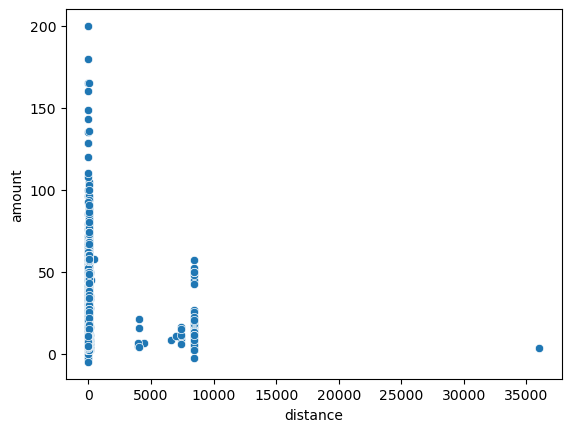

In [41]:
sns.scatterplot(x='distance',y='amount',data=df1)
plt.show()

In [39]:
def remove_outliers(column):
    sorted(column)
    q1,q3 = column.quantile([0.25,0.75])
    iqr = q3-q1
    lr = q1-1.5*iqr
    ur = q3+1.5*iqr
    return lr,ur

In [42]:
lr,ur = remove_outliers(df1['distance'])
df1['distance'] = np.where(df1['distance']>ur,ur,df1['distance'])
df1['distance'] = np.where(df1['distance']<lr,lr,df1['distance'])

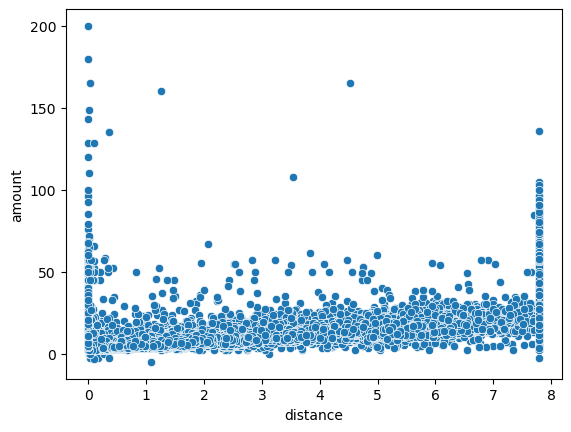

In [43]:
sns.scatterplot(x='distance',y='amount',data=df1)
plt.show()

In [44]:
lr,ur = remove_outliers(df1['amount'])
df1['amount'] = np.where(df1['amount']>ur,ur,df1['amount'])
df1['amount'] = np.where(df1['amount']<lr,lr,df1['amount'])

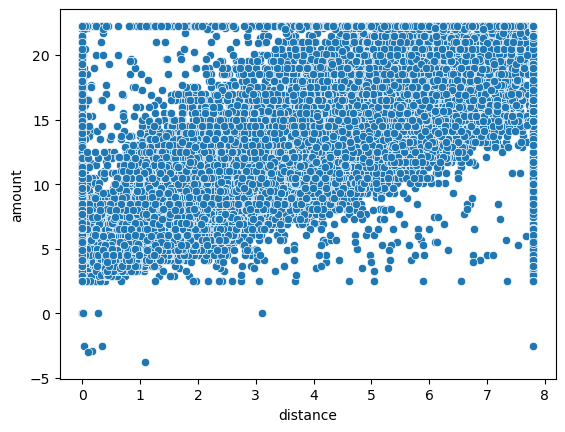

In [45]:
sns.scatterplot(x='distance',y='amount',data=df1)
plt.show()

In [46]:
# now a better correlation is visible...

In [47]:
Y = df1['amount']
X = df1.drop(['amount'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

LinReg = linear_model.LinearRegression()
LinReg.fit(X_train,Y_train)
LinReg.score(X_train,Y_train)

0.7124669052524095

In [48]:
LinReg.score(X_test,Y_test)

0.7155851898394864

In [56]:
# Okay, not so good, but maybe we can make it cleaner

In [79]:
PF = PolynomialFeatures(degree=2,interaction_only=True)
X_train2 = PF.fit_transform(X_train)
X_test2 = PF.fit_transform(X_test)

LinReg.fit(X_train2, Y_train)
LinReg.score(X_train2, Y_train)

0.7124797966639274

In [80]:
LinReg.score(X_test2,Y_test)

0.7156699620563405

In [91]:
# let's try ensemble
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor(n_estimators=15)

BR.fit(X_train2, Y_train)
BR.score(X_train2, Y_train)

0.8981007542456302

In [92]:
BR.score(X_test2, Y_test)

0.6708950399897021

In [93]:
# this is the best obtainable